# Equações não-lineares de uma variável

Muitos problemas na Física envolvem equações não-lineares. Resolver uma equação deste tipo pode ser um desafio enorme, e muitas vezes uma solução analítica não existe ou é desconhecida. Veremos aqui alguns métodos para resolver equações não-lineares de uma única variável.

## Método da bisseção

O método da bisseção, também conhecido como busca binária, é um método robusto para resolver equações não-lineares de uma variável. O usuário especifica um intervalo onde ele espera que a solução esteja, e
o método faz uma busca pela solução dentro deste intervalo. Se existe apenas uma solução dentro do intervalo, então o método a encontra. Um material mais detalhado sobre este método pode ser encontrado no livro colaborativo [Cálculo Numérico - versão Python](https://www.ufrgs.br/reamat/CalculoNumerico/livro-py/sdeduv-metodo_da_bissecao.html#x32-420003.2), do REAMAT/UFRGS, e também na seção 6.3.4 do livro do Mark Newman.

Quando temos uma equação não linear de uma variável, sempre podemos rearranjá-la de tal forma que todos os termos fiquem de um lado da igualdade. Isto é, podemos deixá-la na forma $f(x) = 0$. A busca da solução de uma equação é então equivalente a encontrar os zeros, ou raízes de $f(x)$.

Este método é, na verdade, extremamente simples. Suponha que queremos saber a raiz $x^*$ da função $f(x)$ num intervalo entre $a$ e $b$, se ela existir. Primeiro, calculamos $f(a)$ e $f(b)$. Se $f(a)$ e $f(b)$ têm sinais opostos, e se a função $f(x)$ é contínua nesse intervalo, então a pelo teorema do valor intermediário a função $f(x)$ cruza o eixo $x$ pelo menos uma vez. Ou seja, existe pelo menos uma raiz da função nesse intervalo. Veja na figura abaixo.

*[CC BY-SA Pedro H A Konzen](https://github.com/reamat/CalculoNumerico/blob/master/cap_equacao1d/pics/metodo_da_bissecao/metodo_da_bissecao.py)*

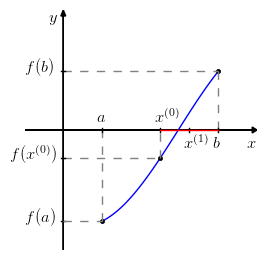

Uma forma prática de fazer esta verificação é testar se $f(a) \times f(b) < 0$.
A ideia então é descobrir um modo de ir encolhendo o intervalo que "cerca" a raiz. Podemos tomar como primeira aproximação da raiz o ponto médio do intervalo $[a, b]$,

$$
x^{(0)} = \frac{a+b}{2}.
$$

O valor da função neste ponto é $f(x^{(0)})$. Agora, se $f(x^{(0)}) \times f(a) < 0$ (ou seja, $f(x^{(0)})$ e $f(a)$ têm sinais opostos), então sabemos que a raiz $x^*$ está no intervalo $[a, x^{(0)}]$. Se não, temos que $f(x^{(0)}) \times f(b) < 0$, e $x^*$ está no intervalo $[x^{(0)}, b]$. Note que agora, a largura do intervalo caiu pela metade. Repetindo esta operação, podemos encontrar a aproximação seguinte, $x^{(1)}$, que, conforme a figura, cerca a raiz no intervalo $[x^{(0)}, x^{(1)}]$, diminuindo a largura do intervalo pela metade novamente. Podemos chegar muito próximos da raiz de $f(x)$ com um número modesto de iterações. Esta sequência de aproximações é o cerne do método da bisseção.

De fato, é mais conveniente definir o problema ao contrário. Ao invés de definir um número de iterações $N$, vamos especificar uma tolerância ou erro $\epsilon$, que é a largura do intervalo. Inicialmente, tomamos $n = 0$. Então fazemos

\begin{align}
a^{(n)} &= a,\\
b^{(n)} &= b,\\
x^{(n)} &= \frac{a^{(n)} + b^{(n)}}{2}.
\end{align}

Se a tolerância foi alcançada,

$$
\left| b^{(n)} - a^{(n)} \right| < \epsilon,
$$

então $x^{(n)}$ é a solução desejada, próxima o suficiente da raiz $x^*$. Se não, começamos outra iteração $n+1$. Testamos se

$$
f(x^{(n)}) \times f(a^{(n)}) < 0.
$$

Caso a condição seja verdadeira, $x^*$ está dentro do intervalo $[a^{(n)}, x^{(n)}]$, e precisamos "cercar" a raiz. Definimos então

\begin{align}
a^{(n+1)} &= a^{(n)}, \\
b^{(n+1)} &= x^{(n)}.
\end{align}

No caso contrário, $x^*$ está dentro do intervalo $[x^{(n)}, b^{(n)}]$, e definimos

\begin{align}
a^{(n+1)} &= x^{(n)}, \\
b^{(n+1)} &= b^{(n)}.
\end{align}

A nova aproximação agora é

$$
x^{(n+1)} = \frac{a^{(n+1)} + b^{(n+1)}}{2}.
$$

Voltamos a verificar o critério de parada, e iteramos este procedimento até que alcancemos a tolerância $\epsilon$. É sempre importante também limitar o número máximo de iterações, $N$, para evitar laços infinitos quando não houver convergência.
Repare que o método é descrito na forma de um algoritmo, sendo muito facilmente traduzido a código.

### Exemplo 1

Vamos determinar a solução da equação

$$
\mathrm{e}^{x} = x + 2
$$

no intervalo $[-2, 0]$, com precisão $\epsilon = 10^{-5}$ (isto é, 5 casas decimais). Primeiro, vamo rescrever a equação como uma função

$$
f(x) = \mathrm{e}^{x} - x - 2.
$$

Como vimos, achar a solução da equação é equivalente a encontrar as raízes de $f(x)$. Vamos primeiro definir a função.

In [2]:
import numpy as np

def f(x):
    return np.exp(x) - x - 2.0

Para descobrir o intervalo inicial, é sempre interessante fazer o gráfico da função.

In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'stix'

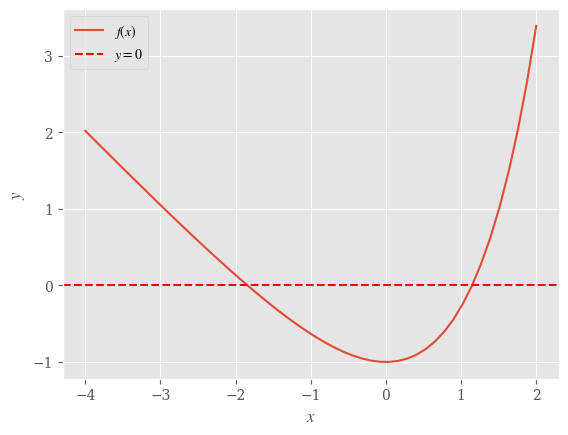

In [4]:
fig, ax = plt.subplots()
x = np.linspace(-4, 2)
ax.plot(x, f(x), label=r'$f(x)$')
ax.axhline(0.0, ls='--', color='r', label=r'$y = 0$')
ax.set_ylabel(r'$y$')
ax.set_xlabel(r'$x$')
ax.legend()
plt.show()

Veja que há duas soluções, uma próxima de $-2$ e outra próxima de $1$. Vamos calcular a primeira solução fazendo o intervalo inicial $[a, b] = [-3, -1]$.

In [5]:
n = 0
a = -3.0
b = -1.0
epsilon = 1e-5

print(f'f(a) = {f(a):.3f}')
print(f'f(b) = {f(b):.3f}')

f(a) = 1.050
f(b) = -0.632


Constatamos que $f(a)$ e $f(b)$ têm sinais opostos, então podemos começar a busca.
Vejamos se a nossa condição de parada, $\left| b - a \right| < \epsilon$, é satisfeita.

In [6]:
delta = np.abs(b - a)
print(f'delta = {delta:.2f}')
print(f'parar? {delta < epsilon}')

delta = 2.00
parar? False


Ainda não alcançamos a tolerância necessária. Neste caso, precisamos escolher em qual dos sub-intervalos devemos continuar a busca. Calculamos a aproximação seguinte.

In [7]:
xn = (a + b) / 2.0
print(f'xn = {xn:.2f}, f(xn) = {f(xn)}')

if (f(a) * f(xn)) < 0:
    print('escolhemos o intervalo à esquerda.')
    b = xn
else:
    print('escolhemos o intervalo à direita.')
    a = xn

print(f'[a, b] = [{a:.2f}, {b:.2f}]')

delta = np.abs(b - a)
print(f'delta = {delta:.2f}')
print(f'parar? {delta < epsilon}')

print(n)

xn = -2.00, f(xn) = 0.1353352832366128
escolhemos o intervalo à direita.
[a, b] = [-2.00, -1.00]
delta = 1.00
parar? False
0


### Exercício 1

Repita o procedimento descrito acima até atingir o nosso critério de parada dado pela tolerância $\epsilon$.

In [8]:
while np.abs(b-a) > epsilon:

  if (f(a) * f(xn)) < 0:
    b = xn

  else:
    a = xn

  xn = (a+b)/2.0
  n = n + 1

print(f"Interação = {n}, Raiz = {xn}, $\delta$ {delta}")

Interação = 18, Raiz = -1.8414039611816406, $\delta$ 1.0


### Convergência da solução

Se tudo deu certo no Exercício 1, você encontrou a solução com cerca de 18 iterações.

A precisão do resultado melhora muito rapidamente com $N$, pois o intervalo diminui pela metade a cada passo. Se o tamanho inicial do intervalo é $\Delta = |b^{(0)} - a^{(0)}|$ , no passo seguinte é $\Delta^{(1)} = \Delta / 2$. Em $N$ passos, o tamanho do intervalo é $\Delta^{(N)} = \Delta / 2^N$. Conforme o nosso critério de parada, se quisermos parar em $N$ passos,

$$
\left| b^{(N)} - a^{(N)} \right| = \Delta^{(N)} = \epsilon \\
\frac{\Delta}{2^N} = \epsilon \\
2^N = \frac{\Delta}{\epsilon}
$$

Tomando o logaritmo de base 2 em ambos os lados,

$$
N = \log_2 \frac{\Delta}{\epsilon}
$$

No nosso exemplo, $\Delta = 2$ e $\epsilon = 10^{-5}$. O número estimado de passos é $N \approx 17.6$, concordando com o nosso resultado.

Mesmo se escolhermos uma precisão muito grande, como $\epsilon = 10^{-20}$, ainda assim precisamos apenas $N = 68$ passos para encontrar a raiz, uma quantidade bastante razoável para um computador executar praticamente de forma instantânea. Isso faz com que o método da bisseção seja um doa mais utilizados para determinar raízes de funções.

Mas, nem tudo são flores. Primeiro, é preciso já ter uma ideia de onde a solução ou raiz está. Pelo menos, precisamos de dois pontos $a$ e $b$ tais que $f(a)$ e $f(b)$ tenham sinais opostos. Isto nem sempre é fácil de obter. Um outro problema é que este método não encontra as chamadas raízes múltiplas, tais como as da função $f(x) = 1 - x^2$. As duas raízes são $x^* = 1$, mas a função apenas toca o eixo x, não o cruza. Logo, qualquer par de pontos $a$, à esquerda de $x^*$, e $b$, à direita de $x^*$, têm valor da função $f(x)$ positivo. Assim, $f(a) \cdot f(b) > 0$, mesmo com o intervalo $[a, b]$ cercando $x^*$. Neste caso, o método da bisseção não vai funcionar, precisamos de outro método.

### Exercício 2

A lei da radiação de Planck nos diz que a intensidade da radiação por unidade de área e por unidade de comprimento de onda $\lambda$, de um corpo negro à temperatura $T$, é

$$
B(\lambda) = \frac{2 \pi h c^2 \lambda^{-5}}{\exp\left(\frac{hc}{\lambda k_\mathrm{B} T} \right) - 1},
$$

onde $h$ é a constante de Planck, $c$ é a velocidade da luz, e $k_\mathrm{B}$ é a constante de Boltzmann. O seu gráfico, para $T = 5500 \,K$ é

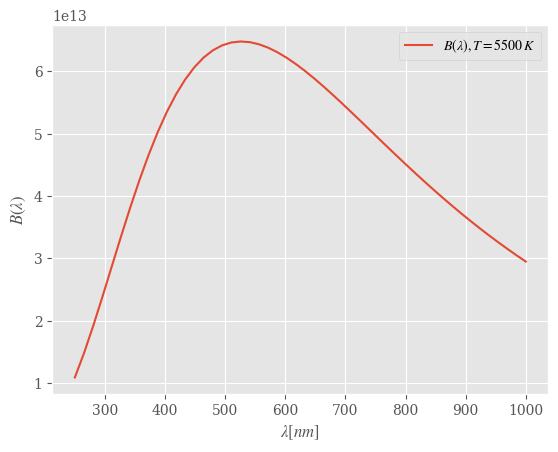

In [9]:
kB = 1.380649e-23 # [J/K]
h = 6.62607015e-34 # [J.s]
c = 299792458.0 # [m/s]

def B(l, T):
    n = 2 * np.pi * h * c**2 * l**-5
    d = np.exp(h * c / (l * kB * T)) - 1
    return n / d


fig, ax = plt.subplots()
ll = np.linspace(250.0e-9, 1000.0e-9)
ax.plot(ll / 1e-9, B(ll, T=5500.0), label=r'$B(\lambda), T= 5500\,K$')
ax.set_ylabel(r'$B(\lambda)$')
ax.set_xlabel(r'$\lambda [nm]$')
ax.legend()
plt.show()

O comprimento onde a intensidade é máxima é dado pela lei emprírica do deslocamento de Wien,

$$
\lambda_\mathrm{M} = \frac{b_\mathrm{W}}{T}.
$$

Podemos encontrar qual o valor da constante $b_\mathrm{W}$ calculando o ponto onde a Lei de Planck tem seu valor máximo. Para encontrar o ponto de máximo, diferenciamos $B(\lambda)$ com relação à $\lambda$, e tomamos o ponto $\lambda_\mathrm{M}$ onde a derivada é zero. Isto é

$$
5 \exp \left( - \frac{hc}{\lambda_\mathrm{M} k_\mathrm{B} T} \right) + \frac{hc}{\lambda_\mathrm{M} k_\mathrm{B} T} - 5 = 0.
$$

Precisamos encontrar o valor de $\lambda_\mathrm{M}$ que satisfaz esta equação. Podemos fazer a seguinte mudança de variáveis:

$$
x = \frac{hc}{\lambda_\mathrm{M} k_\mathrm{B} T},
$$

deixando a equação na forma

$$
5 \mathrm{e}^{-x} + x - 5 = 0.
$$

Veja que, da definção de $x$, já temos a lei de Wien, com a constante $b_\mathrm{W}$ dada por

$$
\lambda_M = \frac{hc}{x k_\mathrm{B} T} \\
\implies b_\mathrm{W} = \frac{hc}{x k_\mathrm{B}}.
$$

Basta apenas determinar $x$ usando o método da bisseção.

**a.** Defina a função $f(x) = 5 \mathrm{e}^{-x} + x - 5$.

In [10]:
def f(x):
    return 5*np.exp(-x) + x - 5

**b.** Como ainda não temos ideia de onde fica a raiz desta função, é preciso plotá-la. Este é um trabalho manual, procure em alguns intervalos. Certifique-se de cercar a raiz, mas não se preocupe em chegar muito perto. Lembre que o método vai fazer esse serviço muito rapidamente!

*Nota: $x=0$ é uma raiz trivial, ela não nos interessa.*

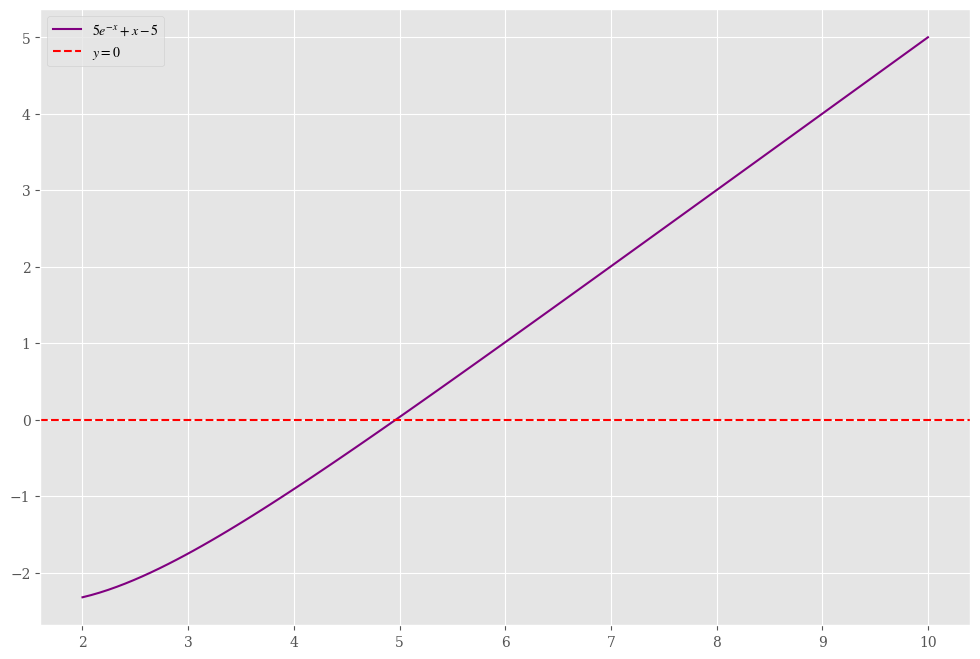

In [11]:
x = np.linspace(2,10,100)
fig, ax = plt.subplots(nrows=1,ncols=1,figsize = (12,8))

ax.plot(x,f(x), color = "purple", label = "$5e^{-x} + x - 5$")
ax.axhline(0,0,color = "red", ls = "--", label = "$y = 0$")
ax.legend()

**c.**  Use o método da bisseção, e encontre a solução com uma tolerância de $\epsilon = 10^{-10}$.

In [12]:
epsilon1 = 1e-10
a = 4
b = 6
delta = np.abs(b-a)
N = 0

while delta > epsilon:

    xn = (a + b)/2

    if f(a) * f(xn) < 0:
        b = xn
    
    else:
        a = xn
    
    N += 1
    delta = np.abs(b-a)
    print(f"Interação {N} ---> xn = {xn} | delta = {delta}")

Interação 1 ---> xn = 5.0 | delta = 1.0
Interação 2 ---> xn = 4.5 | delta = 0.5
Interação 3 ---> xn = 4.75 | delta = 0.25
Interação 4 ---> xn = 4.875 | delta = 0.125
Interação 5 ---> xn = 4.9375 | delta = 0.0625
Interação 6 ---> xn = 4.96875 | delta = 0.03125
Interação 7 ---> xn = 4.953125 | delta = 0.015625
Interação 8 ---> xn = 4.9609375 | delta = 0.0078125
Interação 9 ---> xn = 4.96484375 | delta = 0.00390625
Interação 10 ---> xn = 4.966796875 | delta = 0.001953125
Interação 11 ---> xn = 4.9658203125 | delta = 0.0009765625
Interação 12 ---> xn = 4.96533203125 | delta = 0.00048828125
Interação 13 ---> xn = 4.965087890625 | delta = 0.000244140625
Interação 14 ---> xn = 4.9652099609375 | delta = 0.0001220703125
Interação 15 ---> xn = 4.96514892578125 | delta = 6.103515625e-05
Interação 16 ---> xn = 4.965118408203125 | delta = 3.0517578125e-05
Interação 17 ---> xn = 4.9651031494140625 | delta = 1.52587890625e-05
Interação 18 ---> xn = 4.965110778808594 | delta = 7.62939453125e-06


**d.** Calcule a constante de Wien,

$$
b_\mathrm{W} = \frac{hc}{x k_\mathrm{B}}.
$$

Use $k_\mathrm{B} = 1{,}380649 \times 10^{-23}\,\mathrm{J}\,\mathrm{K}^{-1}$, $h = 6{,}62607015 \times 10^{-34}\,\mathrm{J}\,\mathrm{s}$ e $c = 299792458\,\mathrm{m}\,\mathrm{s}^{-1}$.

In [13]:
def constWein(x):
    
    h = 6.62607015e-34
    c = 299792458
    kb = 1.380649e-23
    
    bw = (h * c)/(x * kb)
    return bw

constwein = constWein(xn)
print(constwein)

0.002897773970411142


**e.** Sabendo o comprimento de onda em que um objeto emite mais intensamente, podemos estimar a sua temperatura. Para o Sol, $\lambda_\mathrm{M} = 502\,\mathrm{nm}$. Calcule a sua temperatura usando a lei do deslocamento de Wien. Compare com a temperatura efetiva do Sol, determinada através da lei de Stefan–Boltzmann (fluxo $F =\sigma T_\text{eff}^4$), que é $T_\text{eff} = 5777\,\mathrm{K}$.

In [14]:
def temp(b,lamb):

    lamb = lamb
    T = b/lamb
    return T


print(f"T = {temp(constwein,5.02e-7):.0f} K")

T = 5772 K


## Método do ponto fixo

O método da bisseção, tem seus prós e contras. Funciona para qualquer equação, desde que tenhamos os pontos cercando a raiz. Existe um método alternativo bastante simples, chamado método do ponto fixo, ou método de relaxação, que pode funcionar bem em alguns casos. Sempre que temos uma equação da forma $f(x) = 0$, pode-se rescrevê-la como

$$
x = g(x).
$$

Vamos ver o caso da equação

$$
x = 2 - \mathrm{e}^{-x}.
$$

Primeiro, definimos a função $g(x)$ em Python.

In [16]:
def g(x):
    return 2.0 - np.exp(-x)

Não existe solução analítica conhecida para esta equação. Podemos tentar encontrar a solução iterando valores na equação. Chutamos um valor inicial para a variável $x^{(0)}$, colocamos no lado direito da igualdade, e obtemos um novo valor $x^{(1)}$ do lado esquerdo. Por exemplo, tomando o valor inicial $x^{(0)} = 1$,

In [17]:
x0 = 1.0
x1 = g(x0)
print(f'x1 ~= {x1:.4f}')

x1 ~= 1.6321


Repetimos então o processo, e se tivermos sorte, o valor de $x^{(n)}$ vai convergir para um chamado ponto fixo da equação. Isto é o que acontece neste exemplo. Iterando $N = 10$ vezes,

In [18]:
N = 10
x1 = 1.0
for i in range(N):
    x2 = g(x1)
    print(f'x_{i + 1} ~= {x2:.8f}')
    x1 = x2

x_1 ~= 1.63212056
x_2 ~= 1.80448547
x_3 ~= 1.83544089
x_4 ~= 1.84045686
x_5 ~= 1.84125511
x_6 ~= 1.84138178
x_7 ~= 1.84140187
x_8 ~= 1.84140506
x_9 ~= 1.84140557
x_10 ~= 1.84140565


Quando o valor de $x$ converge para um ponto fixo, os dois lados da equação $x = g(x)$ são iguais. Esta condição é a própria definição de solução de uma equação. Graficamente, a convergência ocorre conforme a figura abaixo:

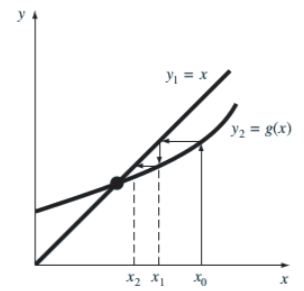

Veja que o programa é muito simples, quase trivial, e quando converge, faz isso bem rapidamente. Mas, este método tem algumas desvantagens. Primeiro, nem sempre é fácil rescrever equação de uma forma forma $x = g(x)$ que faça o método funcionar. Na verdade, existem múltiplas equações desta forma que expressam a mesma equação original (isto é, têm a mesma solução). Entretanto, algumas formas convergem quando usamos o método do ponto fixo, e outras não.

### Exemplo 2

Considere a equação

$$
\ln x + x^2 - 1 = 0.
$$

Uma forma de deixá-la adequada para o método do ponto fixo é tomar a exponencial dos dois lados da igualdade,

\begin{align}
\mathrm{e}^{\ln x + x^2 - 1} &= \mathrm{e}^0 \\
\mathrm{e}^{\ln x}\ \mathrm{e}^{x^2 - 1} &= 1 \\
x\ \mathrm{e}^{x^2 - 1} &= 1 \\
x\ &= \mathrm{e}^{1 - x^2}
\end{align}

Nenhuma das duas formas têm solução analítica conhecida, mas um $x$ que satisfaz a primeira equação, satisfaz também a segunda. Neste caso particular, é fácil descobrir por intuição que a solução é $x^* = 1$. Se tentarmos encontrar esta solução com o método do ponto fixo, com valor inicial $x^{(0)} = 0.5$, obtemos

In [22]:
def g(x):
    return np.exp(1.0 - x**2)

x = 0.5
for i in range(10):
    x = g(x)
    print(f'x_{i + 1} ~= {x:.8f}')

x_1 ~= 2.11700002
x_2 ~= 0.03075542
x_3 ~= 2.71571183
x_4 ~= 0.00170347
x_5 ~= 2.71827394
x_6 ~= 0.00167991
x_7 ~= 2.71827416
x_8 ~= 0.00167991
x_9 ~= 2.71827416
x_10 ~= 0.00167991


Em vez de convergir para um local, o valor de $x$ oscila entre dois valores, não importa quantas iterações façamos. Neste caso o método do ponto fixo falha.

Podemos tentar expressar a equação original de outra forma.

\begin{align}
\ln x + x^2 - 1 &= 0 \\
x^2 &= 1 - \ln x \\
x &= \sqrt{1 - \ln x}.
\end{align}

Aplicando o método do ponto fixo,

In [28]:
def g(x):
    # Note que np.log() é o logaritmo natural, de base e.
    # Para logaritmo de base 10, use np.log10().
    return np.sqrt(1.0 - np.log(x))

x = 0.5
i = 0
while True:
    x = g(x)
    print(f"Interação: {i} --> x = {x}")
    i += 1
    if i == 10:
        break

Interação: 0 --> x = 1.3012098910475378
Interação: 1 --> x = 0.8583154914892762
Interação: 2 --> x = 1.0736775779454883
Interação: 3 --> x = 0.9637999044091371
Interação: 4 --> x = 1.0182689104343374
Interação: 5 --> x = 0.990906635925747
Interação: 6 --> x = 1.004557096969838
Interação: 7 --> x = 0.997724037576543
Interação: 8 --> x = 1.0011386299421705
Interação: 9 --> x = 0.9994308469350205


O método agora converge (porém oscilando) para a solução $x^* = 1$.

Para entender melhor por que o método do ponto fixo funciona para o segundo caso e não para o primeiro, leia a  [seção 3.3 do livro Cálculo Numérico](https://www.ufrgs.br/reamat/CalculoNumerico/livro-py/sdeduv-iteracao_de_ponto_fixo.html) do REAMAT/UFRGS. De forma simplificada, vamos admitir que a equação $x = g(x)$ tem uma solução em $x = x^*$. Próximo deste valor, podemos usar uma expansão de Taylor de $g(x)$ ao redor de $x^*$ para estimar onde o próximo ponto de uma iteração vai parar. Isto é,

$$
x^{(n+1)} = g(x^{(n)}) = g(x^*) + (x^{(n)} - x^*)\ g^\prime(x^*) + \ldots,
$$

onde $g^\prime(x^*)$ é a derivada de $g(x)$ no ponto $x = x^*$. Mas, por definição, $x^*$ é uma solução da equação original, logo $x^* = g(x^*)$. Assim,

$$
x^{(n+1)} - g(x^*) = (x^{(n)} - x^*)\ g^\prime(x^*) + \ldots \\
x^{(n+1)} - x^* = (x^{(n)} - x^*)\ g^\prime(x^*) + \ldots.
$$

Desconsiderando termos de segunda ordem, e definindo $\epsilon^{(n)} = x^{(n)} - x^*$ como o erro da iteração atual em relação à solução verdadeira, vemos que

$$
\epsilon^{(n+1)} \approx \epsilon^{(n)} g^\prime(x^*).
$$

Isto é, a distância até a solução é multiplicada a cada passo por um fator $g^\prime(x^*)$, a derivada de $g(x)$ em $x = x^*$. Se o valor absoluto dessa derivada for maior que 1, então a distância vai aumentar a cada passo, e o método não vai convergir. Em outras palavras, a condição para que haja convergência no método do ponto fixo é

$$
|g^\prime(x^*)| < 1.
$$

No nosso exemplo, quando não houve convergência,

$$
g(x) = \mathrm{e}^{1 - x^2},\ x^* = 1 \\
|g^\prime(x^*)| = \left| -2\mathrm{e}^{1-(x^*)^2}  \right| = 2,
$$

logo, a não convergência é esperada.

Na prática, não se sabe de antemão o valor de $x^*$, logo não podemos estimar o erro de forma precisa. Assim, precisamos calcular o erro com base nos valores calculados $x^{(n)}$. Podemos analisar a evolução da solução com base na diferença entre a posição atual e a anterior,

$$
\Delta^{(n+1)} = x^{(n + 1)} - x^{(n)}.
$$


Fazendo $\epsilon^{(n+1)} - \epsilon^{(n)}$, temos

\begin{align}
\epsilon^{(n+1)} - \epsilon^{(n)} &= x^{(n+1)} - x^* - x^{(n)} + x^* \\
\epsilon^{(n+1)} - \epsilon^{(n)} &= x^{(n+1)} - x^{(n)} \\
\Delta^{(n+1)} &= \epsilon^{(n+1)} - \epsilon^{(n)}.
\end{align}

Por outro lado,

$$
\epsilon^{(n+1)} = \epsilon^{(n)} g^\prime(x^*) \\
\epsilon^{(n)} = \frac{\epsilon^{(n+1)}}{g^\prime(x^*)},
$$

portanto

\begin{align}
\Delta^{(n+1)} &= \epsilon^{(n+1)} - \frac{\epsilon^{(n+1)}}{g^\prime(x^*)} \\
&= \epsilon^{(n+1)}\left(1 - \frac{1}{g^\prime(x^*)} \right)
\end{align}
$$
\implies \epsilon^{(n+1)} = \frac{1}{1 - \frac{1}{g^\prime(x^*)}} \Delta^{(n+1)}.
$$

Agora, próximo da convergência, $g^\prime(x^*) \approx g^\prime(x)$. Caso a derivada seja desconhecida, ou difícil de calcular, podemos estimar a derivada usando uma diferença finita (que veremos com mais detalhes adiante no curso). Também, sabemos que $x^{(n+1)} = g(x^{(n)})$. Logo,

$$
g^{\prime}(x) \approx \frac{g(x^{(n)}) - g(x^{(n-1)})}{x^{(n)} - x^{(n-1)}} = \frac{x^{(n+1)} - x^{(n)}}{x^{(n)} - x^{(n-1)}} = \frac{\Delta^{(n+1)}}{\Delta^{(n)}}.
$$

Finalmente, o erro estimado no passo $n + 1$ é

\begin{align}
\epsilon^{(n+1)} &= \frac{1}{1 - \frac{\Delta^{(n)}}{\Delta^{(n+1)}}} \Delta^{(n + 1)} \\
&= \frac{\left[\Delta^{(n + 1)}\right]^2}{\Delta^{(n+1)} - \Delta^{(n)}}.
\end{align}

Assim, podemos estimar o erro apenas guardando a diferença do passo anterior. Vejamos como fica o nosso exemplo, convergindo para uma tolerância $\epsilon = 10^{-3}$.

In [29]:
def g(x):
    return np.sqrt(1.0 - np.log(x))

x1 = 0.5
# Valor qualquer para começar o laço.
delta1 = 0.0
N = 10
epsilon = 1e-3

for i in range(N):
    x2 = g(x1)
    delta2 = x2 - x1
    epsilon2 = delta2**2 / (delta2 - delta1)
    print(f'x_{i + 1} = {x2}; epsilon_{i + 1} = {epsilon2:.3e}')
    if np.abs(epsilon2) < epsilon:
        # Convergiu.
        break
    else:
        # Guardar os valores anteriores
        x1 = x2
        delta1 = delta2

x_1 = 1.3012098910475378; epsilon_1 = 8.012e-01
x_2 = 0.8583154914892762; epsilon_2 = -1.577e-01
x_3 = 1.0736775779454883; epsilon_3 = 7.046e-02
x_4 = 0.9637999044091371; epsilon_4 = -3.712e-02
x_5 = 1.0182689104343374; epsilon_5 = 1.805e-02
x_6 = 0.990906635925747; epsilon_6 = -9.149e-03
x_7 = 1.004557096969838; epsilon_7 = 4.543e-03
x_8 = 0.997724037576543; epsilon_8 = -2.279e-03
x_9 = 1.0011386299421705; epsilon_9 = 1.138e-03
x_10 = 0.9994308469350205; epsilon_10 = -5.694e-04


### Exercício 3

Na teoria de campo médio do ferromagnetismo, a intensidade $M$ da magnetização de um material ferromagnético como ferro depende da temperatura $T$ conforme a equação

$$
M = \mu \tanh \frac{JM}{k_\mathrm{B}T},
$$

onde $\mu$ é o momento magnético, $J$ é uma constante de acoplamento, e $k_\mathrm{B}$ é a constante de Boltzmann. Para simplificar, vamos definir $m = \frac{M}{\mu}$ e $C =  \frac{\mu J}{k_\mathrm{B}}$, ficando com a equação

$$
m = \tanh \frac{Cm}{T}.
$$

É fácil ver que esta equação tem uma solução em $m=0$, que significa "sem magnetização". Mas e as outras soluções? Não há método conhecido para resolver esta equação analiticamente, vamos encontrá-la numericamente. Vamos tomar $C = 1$ por simplicidade e buscar soluções em função de $T$, com tolerância de $\epsilon = \pm 10^{-10}$ da resposta verdadeira. É possível encontrar a derivada da função $g(m)$ analiticamente, e utilizá-la para calcular o erro. A implementação disto fica como exercício.

**a.** Defina uma função que calcula $m$ usando o método do ponto fixo. Calcule $m$ para alguns valores de $T$.

*Dica: use $N$ grande, pois alguns pontos podem demorar bastante para convergir.*

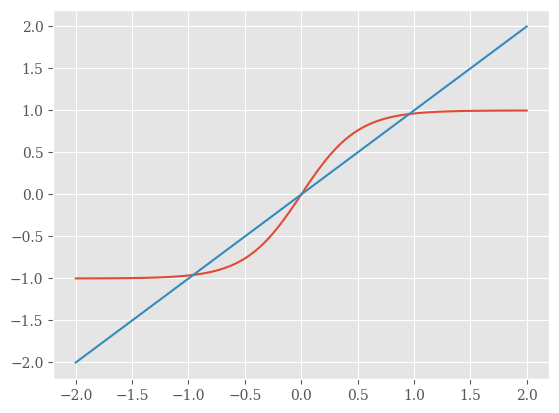

In [5]:
def f(m,T):
    C = 1
    return np.tanh((C*m)/T)

m = np.linspace(-2,2,100)

fig, ax = plt.subplots(1,1)

ax.plot(m,(f(m,0.5)))
ax.plot(m,m)

In [13]:
x1 = 0.5
epsilon1 = 1e-10
delta1 = 0
N = 10000

for i in range(N):
    x2 = f(x1,0.5)
    delta2 = x2 - x1
    epsilon2 = delta2**2 / (delta2 - delta1)
    print(f"Interação {i} -- > x2 = {x2}")

    if np.abs(epsilon2) < epsilon1:
        break

    else:
        x1 = x2
        delta2 = delta1

Interação 0 -- > x2 = 0.7615941559557649
Interação 1 -- > x2 = 0.9092516739969425
Interação 2 -- > x2 = 0.9486889866196807
Interação 3 -- > x2 = 0.9560124229062422
Interação 4 -- > x2 = 0.957255153132631
Interação 5 -- > x2 = 0.9574625991593537
Interação 6 -- > x2 = 0.9574971315804308
Interação 7 -- > x2 = 0.9575028773430442
Interação 8 -- > x2 = 0.9575038332922827
Interação 9 -- > x2 = 0.9575039923359607
Interação 10 -- > x2 = 0.9575040187964008
Interação 11 -- > x2 = 0.9575040231986798
Interação 12 -- > x2 = 0.9575040239310961
Interação 13 -- > x2 = 0.9575040240529498
Interação 14 -- > x2 = 0.9575040240732228


In [18]:
def magnetizacao(T):   
    x1 = 0.5
    epsilon1 = 1e-10
    delta1 = 0
    N = 1000000

    for i in range(N):
        x2 = f(x1,T)
        delta2 = x2 - x1
        epsilon2 = delta2**2 / (delta2 - delta1)

        if np.abs(epsilon2) < epsilon1:
            break

        else:
            x1 = x2
            delta2 = delta1
    
    return x2

**b.** Faça um gráfico da magnetização em função da temperatura, com $0{,}01 \lt T \lt 1{,}5$. Verifique que ocorre uma mudança de fase em $T = 1$.

C:\Users\pedri\AppData\Local\Temp\ipykernel_7764\2910510348.py:10: RuntimeWarning: invalid value encountered in double_scalars
  epsilon2 = delta2**2 / (delta2 - delta1)


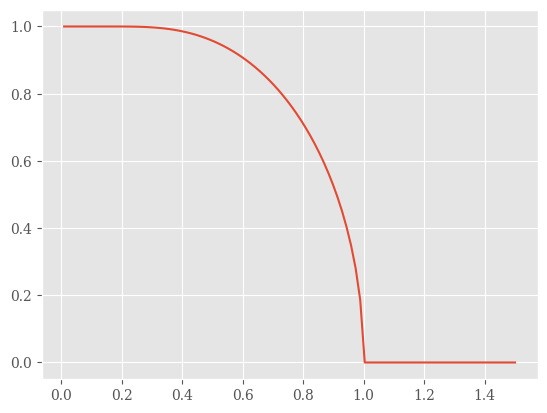

In [20]:
T = np.linspace(0.01,1.5,100)
mag = np.zeros(100)

fig, ax = plt.subplots(1,1)
for i in range(len(T)):
    m = magnetizacao(T[i])
    mag[i] = m

ax.plot(T, mag)

## Conclusão

A solução numérica de equações não-lineares é um pouco como artesanato. É preciso testar, chutar soluções, e tentar vários métodos. Estes dois métodos vistos aqui são bastante úteis para uma boa parte das equações que encontramos por aí. Na próxima semana veremos algums métodos mais refinados.

$$\frac{3}{x^{2}}-2 = x$$

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def f(x):
    return (3/(x**2)) - 2

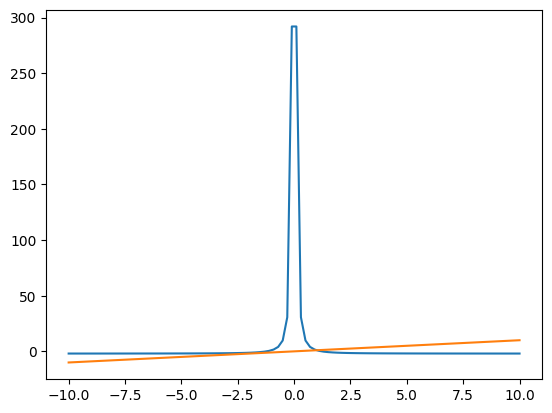

In [7]:
x = np.linspace(-10,10,100)

fig, ax = plt.subplots(1,1)

ax.plot(x,f(x))
ax.plot(x,x)

In [10]:
epsilon = 1e-4
delta1 = 0
x1 = 2.5
N = 1000

for i in range(N):
    x2 = f(x1)
    delta2 = x2 - x1
    epsilon2 = delta2**2 / (delta2 - delta1)
    print(f"Interação {i} --> x = {x2} | delta = {epsilon2}")

    if np.abs(epsilon2) < epsilon:
        break
    
    else:
        x1 = x2
        delta1 = delta2

Interação 0 --> x = -1.52 | delta = -4.02
Interação 1 --> x = -0.7015235457063711 | delta = 0.13845343933390503
Interação 2 --> x = 4.095884790906763 | delta = 5.784247488747811
Interação 3 --> x = -1.8211760061716613 | delta = -3.2676941843276808
Interação 4 --> x = -1.0954815810244134 | delta = 0.07927921187397675
Interação 5 --> x = 0.49983356448990657 | delta = 2.9265981753897305
Interação 6 --> x = 10.00799289516779 | delta = 11.425107299226841
Interação 7 --> x = -1.9700478999344861 | delta = -6.67747021107693
Interação 8 --> x = -1.2270210216199011 | delta = 0.04339957589028585
Interação 9 --> x = -0.007413203309725169 | delta = 3.121071586490782
Interação 10 --> x = 54587.53975622774 | delta = 54588.76680449874
Interação 11 --> x = -1.999999998993221 | delta = -27295.268033903947
Interação 12 --> x = -1.2499999992449156 | delta = 1.0304030297957892e-05
